**Setup & Dependencies**

In [53]:
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt

#Data import
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

!pip install yfinance --upgrade --no-cache-dir
yf.pdr_override()

#For mounting to drive
from google.colab import drive

#Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor

#Modeling Metrics
from sklearn import metrics

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


In [0]:
#Mount folder to save and retrive outputs
drive.mount('/content/drive',force_remount=True)
%cd "/content/drive/My Drive/finance_homework"

Import Data and Discovery

In [0]:
df_full = pdr.get_data_yahoo('AAPL', start="2018-01-01").reset_index()

df_full.to_csv('AAPL.csv',index=False)



In [57]:
df_full.shape

(427, 7)

In [0]:
df_full.head()

In [0]:
df_full.describe()

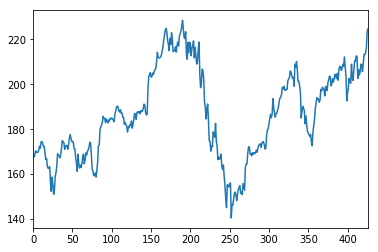

In [17]:
df_full["Adj Close"].plot()

**Data Preprocessing**

In [0]:
df_full.set_index("Date", inplace=True)

In [20]:
df_full.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,167.701889,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,167.672668,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,168.451508,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,170.369385,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,169.736588,20567800


In [0]:
window_size=32
num_samples=len(df_full)-window_size

#Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

data = df_full['Adj Close'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day


In [0]:
split_fraction=0.8
ind_split=int(split_fraction*num_samples)

In [0]:
x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

In [92]:
x_train.shape


(316, 32)

**Modeling**

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

**Baseline**

In [0]:
y_pred_lag=np.roll(y_test,1)

In [76]:
get_performance(y_pred_lag)

Mean Absolute Error: 2.9978
Mean Squared Error: 32.159
Root Mean Squared Error: 5.6709


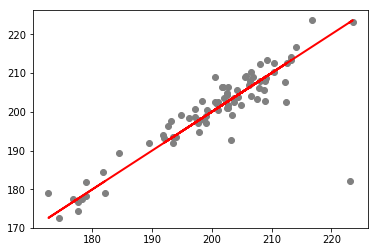

In [68]:
get_plot(y_pred_lag)

**Linear Regression**

In [77]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_lr=model_lr.predict(x_test)

In [80]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9274
Mean Squared Error: 13.8112
Root Mean Squared Error: 3.7163


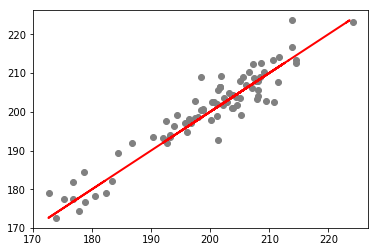

In [82]:
get_plot(y_pred_lr)

In [93]:
get_performance(y_pred_lr)

Mean Absolute Error: 2.9274
Mean Squared Error: 13.8112
Root Mean Squared Error: 3.7163


In [94]:
model_lr.coef_

array([ 0.02348209, -0.00905243,  0.08685105, -0.26303329,  0.26082259,
       -0.20545679,  0.05518024,  0.16851988, -0.18973038,  0.0043908 ,
        0.00651859,  0.00690183, -0.0113458 ,  0.01839599, -0.10998312,
        0.14211821,  0.05761842, -0.05632126,  0.01505567, -0.08591634,
        0.07054529, -0.04318123,  0.06538478,  0.03451945, -0.17747919,
        0.10054766,  0.01606395, -0.01047428,  0.07287593, -0.0022832 ,
       -0.06355945,  0.99453763])

**Ridge Regression**

In [0]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(x_test)

In [84]:
get_performance(y_pred_ridge)

Mean Absolute Error: 2.9271
Mean Squared Error: 13.8086
Root Mean Squared Error: 3.716


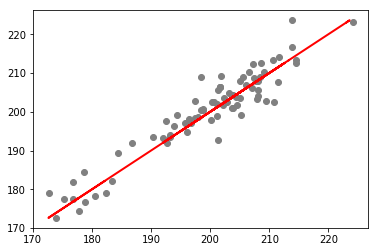

In [85]:
get_plot(y_pred_ridge)

In [95]:
model_ridge.coef_

array([ 0.02351773, -0.00901577,  0.08657704, -0.26260375,  0.2603933 ,
       -0.20519894,  0.05523031,  0.16824624, -0.18952016,  0.00434112,
        0.00647147,  0.00695815, -0.01136474,  0.01829567, -0.10977201,
        0.14198818,  0.0576404 , -0.05630255,  0.0149895 , -0.08579866,
        0.07040635, -0.04305157,  0.06533761,  0.03441333, -0.17730418,
        0.10045331,  0.01603456, -0.0103417 ,  0.07277438, -0.00229984,
       -0.06310669,  0.99411478])

**Gradient Boosting Trees**

In [0]:
# Model #2 - Gradient Boosting Trees
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)

# Infer
y_pred_gb = model_gb.predict(x_test)

In [87]:
get_performance(y_pred_gb)

Mean Absolute Error: 3.5272
Mean Squared Error: 18.0707
Root Mean Squared Error: 4.251


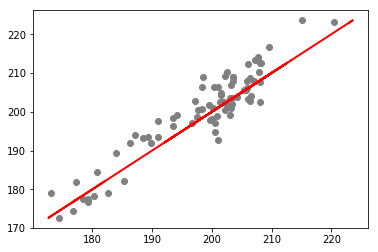

In [88]:
get_plot(y_pred_gb)

**Comparison**

In [0]:
df_comp=pd.DataFrame({"lag":np.absolute(y_test-y_pred_lag), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "gb":np.absolute(y_test-y_pred_gb)})

(11, 20)

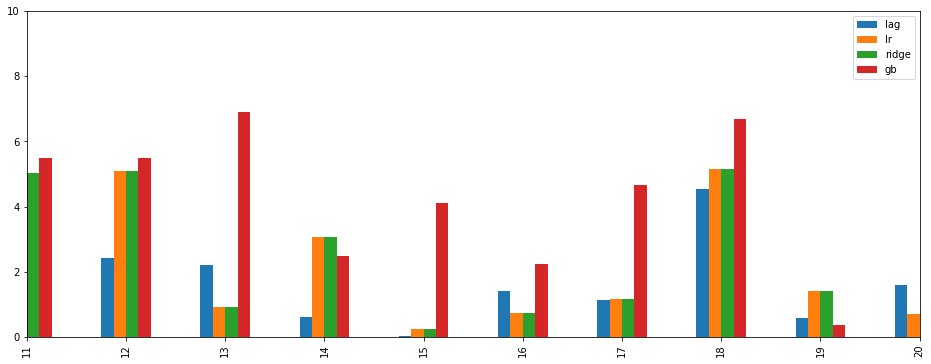

In [103]:
df_comp.plot.bar(figsize=(16, 6))
plt.ylim(0,10)
plt.xlim(11,20)